# setup

In [ ]:
# %%capture
# !pip install bertopic
# !pip install bertopic --no-build-isolation --no-binary :all: # in case of conflicting with numpy

# load data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("sent_tweet_data.csv")
data.head()

,Tweet_Id,Tweet,sentiment_analysis,sentiment,score
0,1.598104e+18,@elonmusk I thunk you're an irresponsible for ...,"('negative', 0.8987942934036255)",negative,0.898794
1,1.598104e+18,"Apparently ""I've had COVID for over a week and...","('negative', 0.5844972133636475)",negative,0.584497
2,1.598103e+18,@snakewasright @EllenOl00313689 @iTruthSearch ...,"('negative', 0.7049756646156311)",negative,0.704976
3,1.598103e+18,They're dropping the sequel to COVID baby wooo...,"('neutral', 0.5086733102798462)",neutral,0.508673
4,1.598101e+18,@1goodtern They drop dead one by one of post C...,"('negative', 0.47382649779319763)",negative,0.473826


## positive data 

In [3]:
# get the tweet text and sentiment columns whre sentiment is positive as list
positive_data = data[data["sentiment"] == "positive"]
positive_data.head()


,Tweet_Id,Tweet,sentiment_analysis,sentiment,score
8,1.598098e+18,"My friend spencer has covid, good thing he ate...","('positive', 0.48467978835105896)",positive,0.484680
16,1.598092e+18,"""I had my baby shower here. Very big space, th...","('positive', 0.9333032369613647)",positive,0.933303
23,1.598088e+18,"Nat de covid 😭✨ Se cuide, baby https://t.co/yE...","('positive', 0.7633681893348694)",positive,0.763368
36,1.598079e+18,Get Well Soon my baby 🥹🍼 I know you're strong ...,"('positive', 0.947133481502533)",positive,0.947133
75,1.598065e+18,There’s a chosen family baby I know who’s just...,"('positive', 0.5353631377220154)",positive,0.535363


In [4]:
positive_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45263 entries, 8 to 446181
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tweet_Id            45263 non-null  float64
 1   Tweet               45263 non-null  object 
 2   sentiment_analysis  45263 non-null  object 
 3   sentiment           45263 non-null  object 
 4   score               45263 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


In [5]:
positive_tweets = positive_data["Tweet"].tolist()

In [6]:
len(positive_tweets)

45263

In [7]:
from bertopic import BERTopic

Topic Model Spesifications:  
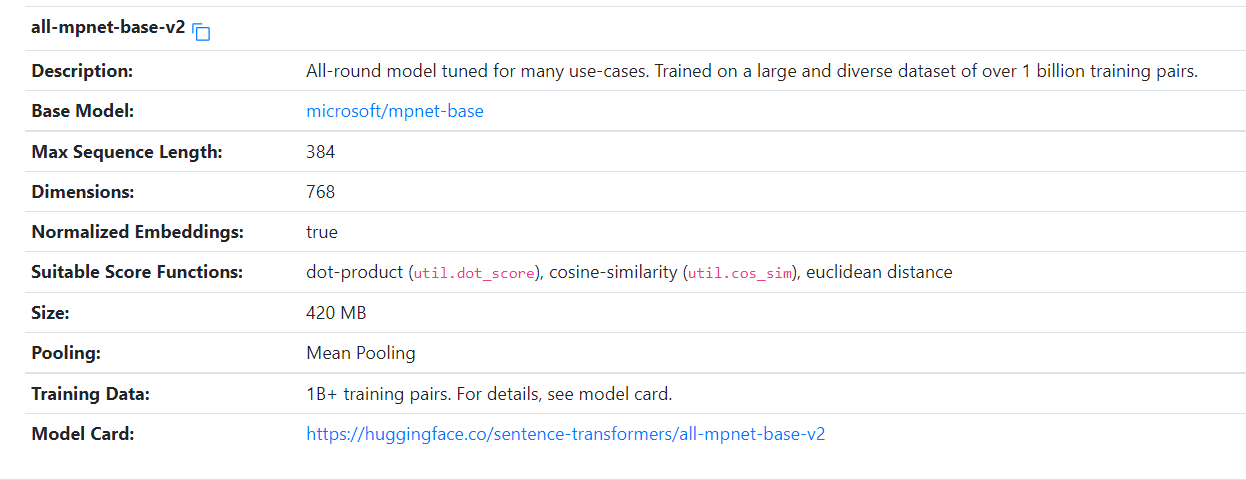

In [8]:
topic_model = BERTopic(verbose=True, embedding_model="all-mpnet-base-v2", min_topic_size=40,  calculate_probabilities=True)

In [9]:
topics, probs = topic_model.fit_transform(positive_tweets)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/1415 [00:00<?, ?it/s]

In [ ]:
freq = topic_model.get_topic_info()

In [ ]:
freq.head(20)

In [ ]:
topic_model.get_topic(0)  # Select the most frequent topic

# Topic Visualization

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_term_rank()